<a href="https://colab.research.google.com/github/Reichart88/Reichart88/blob/main/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.summary()

<ipython-input-23-829917038710>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(weights='imagenet',include_top=False,input_shape=(150, 150, 3))


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 75, 75, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 75, 75, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 75, 75, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 75, 75, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 76, 76, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 37, 37, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 37, 37, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 37, 37, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 37, 37, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 37, 37, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
!unzip -qo "cat-and-dog" -d ./temp


import os

import shutil
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_PATH = './temp/training_set/training_set/'
BASE_DIR = './dataset/'

CLASS_LIST = sorted(os.listdir(IMAGE_PATH))
CLASS_COUNT = len(CLASS_LIST)
if os.path.exists(BASE_DIR):
  shutil.rmtree(BASE_DIR)

os.mkdir(BASE_DIR)

train_dir = os.path.join(BASE_DIR, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(BASE_DIR, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(BASE_DIR, 'test')
os.mkdir(test_dir)

def create_dataset(
    img_path: str,
    new_path: str,
    class_name: str,
    start_index: int,
    end_index: int
):
    src_path = os.path.join(img_path, class_name)
    dst_path = os.path.join(new_path, class_name)
    class_files = os.listdir(src_path)
    os.mkdir(dst_path)
    for fname in class_files[start_index : end_index]:
      src = os.path.join(src_path, fname)
      dst = os.path.join(dst_path, fname)
      shutil.copyfile(src, dst)

for class_label in range(CLASS_COUNT):
  class_name = CLASS_LIST[class_label]
  create_dataset(IMAGE_PATH, train_dir, class_name, 0, 3000)
  create_dataset(IMAGE_PATH, validation_dir, class_name, 3000, 3500)
  create_dataset(IMAGE_PATH, test_dir, class_name, 3500, 4005)

--2024-10-17 09:39:08--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  31.7MB/s    in 7.9s    

2024-10-17 09:39:17 (27.5 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 40

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 1024))
  labels = np.zeros(shape=(sample_count, 2))

  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='categorical',
  )
  i = 0
  for input_batch, labels_batch in generator:
    features_batch = conv_base.predict(input_batch, verbose = 0)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 6000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1005)

train_features = np.reshape(train_features, (6000, 4 * 4 * 1024))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 1024))
test_features = np.reshape(test_features, (1005, 4 * 4 * 1024))

Found 6000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1005 images belonging to 2 classes.


In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras import optimizers

model = models.Sequential()

model.add(layers.Input(shape=(4 * 4 * 1024,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.compile(
    optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['acc']
)

history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=40,
    validation_data=(validation_features, validation_labels)
)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - acc: 0.8515 - loss: 0.5973 - val_acc: 0.9580 - val_loss: 0.1092
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - acc: 0.9569 - loss: 0.1350 - val_acc: 0.9680 - val_loss: 0.0899
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.9776 - loss: 0.0677 - val_acc: 0.9580 - val_loss: 0.1461
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - acc: 0.9828 - loss: 0.0473 - val_acc: 0.9670 - val_loss: 0.0865
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - acc: 0.9883 - loss: 0.0393 - val_acc: 0.9700 - val_loss: 0.0845
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.9933 - loss: 0.0179 - val_acc: 0.9710 - val_loss: 0.0870
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - acc: 0.9945 - loss: 0.0153 - val_acc: 0.9680 - val_loss: 0.0947
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - acc: 0.9967 - loss: 0.0111 - val_acc: 0.9710 - val_loss: 0.0949
Epoch 9/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
NUM_CLASSES = 2
from keras import Input, Model

model = models.Sequential()
def model_maker():
  base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

  for layer in base_model.layers[:]:
    layer.trainable = False

  input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  custom_model = base_model(input)
  custom_model = GlobalAveragePooling2D()(custom_model)
  custom_model = Dense(64, activation='relu')(custom_model)
  custom_model = Dropout(0.5)(custom_model)
  predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
  return Model(inputs=input, outputs=predictions)

model = model_maker()
model.summary()

<ipython-input-21-6750a4cfe44d>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,294,594 (12.57 MB)

 Trainable params: 65,730 (256.76 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc']
)
train_classes = train_generator.classes
num_classes = np.unique(train_classes).shape[0]
print(f'Количество классов: {num_classes}')

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Found 6000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Количество классов: 2
Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 161s 520ms/step - acc: 0.6621 - loss: 0.8889 - val_acc: 0.8570 - val_loss: 0.3427
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 201s 518ms/step - acc: 0.7657 - loss: 0.5696 - val_acc: 0.8980 - val_loss: 0.2563
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 204s 527ms/step - acc: 0.8139 - loss: 0.4428 - val_acc: 0.9190 - val_loss: 0.2127
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 200s 521ms/step - acc: 0.8456 - loss: 0.3730 - val_acc: 0.9280 - val_loss: 0.1892
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 201s 518ms/step - acc: 0.8579 - loss: 0.3338 - val_acc: 0.9340 - val_loss: 0.1701
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 203s 522ms/step - acc: 0.8700 - loss: 0.3094 - val_acc: 0.9380 - val_loss: 0.1562
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 161s 531ms/step - acc: 0.8851 - loss: 0.2854 - val_acc: 0.9460 - val_loss: 0.1447
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import matplotlib.pyplot as plt
def show_history(store):
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

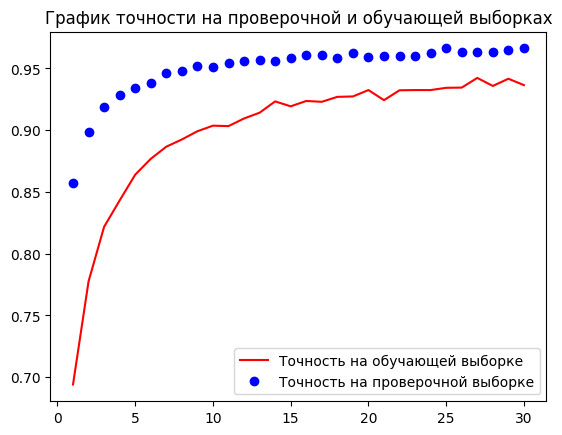

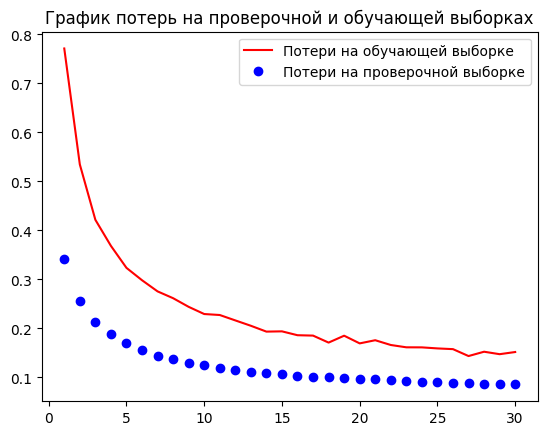

In [ ]:
show_history(history)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Точность на контрольной выборке:', test_acc)

Found 1005 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - acc: 0.9740 - loss: 0.0855
Точность на контрольной выборке: 0.9700000286102295
